Compare March 14, 2016 currents with OceanViewer

In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import pytz

from salishsea_tools import tidetools, viz_tools, nc_tools
from nowcast import research_VENUS
%matplotlib inline

In [2]:
ts=0
fU = nc.Dataset('/results/SalishSea/nowcast/14mar16/SalishSea_1h_20160314_20160314_grid_U.nc')
u = fU.variables['vozocrtx'][ts,0,:,:]

fV = nc.Dataset('/results/SalishSea/nowcast/14mar16/SalishSea_1h_20160314_20160314_grid_V.nc')
v = fV.variables['vomecrty'][ts,0,:,:]

t = nc_tools.timestamp(fU,ts)

print(t.to('US/Pacific'))

2016-03-13T17:30:00-07:00


Weird. Oceanviewer is reading the first time as 18:30 PDT - but I think 17:30 PDT or 16:30 PST are correct. 

00:30 UTC should be -8 hours to PST which is 4:30pm which is 16:30

Maybe the first time in Oceanviewer isn't t=0 on the NEMO file or I am totally confused about timezones?

Better trust the time reported on OceanViewer and compare 1830 PDT

In [3]:
ts=1
fU = nc.Dataset('/results/SalishSea/nowcast/14mar16/SalishSea_1h_20160314_20160314_grid_U.nc')
u = fU.variables['vozocrtx'][ts,0,:,:]

fV = nc.Dataset('/results/SalishSea/nowcast/14mar16/SalishSea_1h_20160314_20160314_grid_V.nc')
v = fV.variables['vomecrty'][ts,0,:,:]

t = nc_tools.timestamp(fU,ts)

print(t.to('US/Pacific'))

2016-03-13T18:30:00-07:00


In [4]:
grid_B = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
bathy, X, Y = tidetools.get_bathy_data(grid_B)
Xs=X[1:,1:]
Ys=Y[1:,1:]

mesh_mask = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/mesh_mask_SalishSea2.nc')

umask = 1- mesh_mask.variables['umask'][0,0,:,:]
vmask = 1- mesh_mask.variables['vmask'][0,0,:,:]

In [5]:
um = np.ma.array(u,mask=umask)
vm = np.ma.array(v,mask=vmask)
urot, vrot = research_VENUS.unstag_rot(um,vm)

uunstag, vunstag = viz_tools.unstagger(um, vm)

Rotated

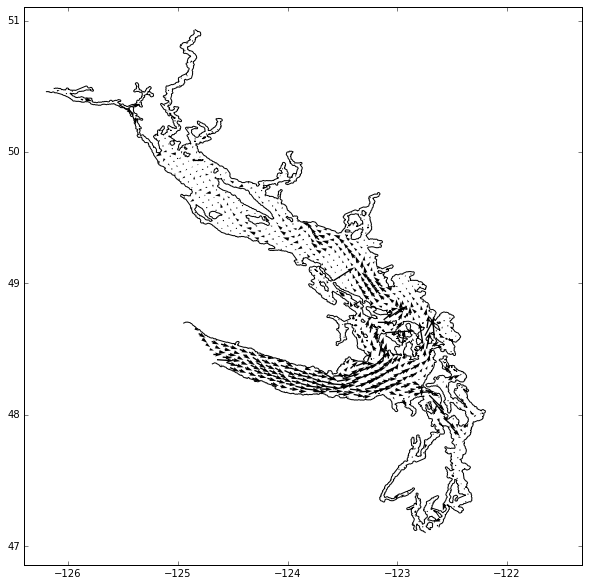

In [6]:
fig,ax = plt.subplots(1,1,figsize=(10,10))

st=10
ax.quiver(Xs[::st,::st],Ys[::st,::st],urot[::st,::st],vrot[::st,::st])
viz_tools.plot_coastline(ax,grid_B,coords='map')


Not Rotated

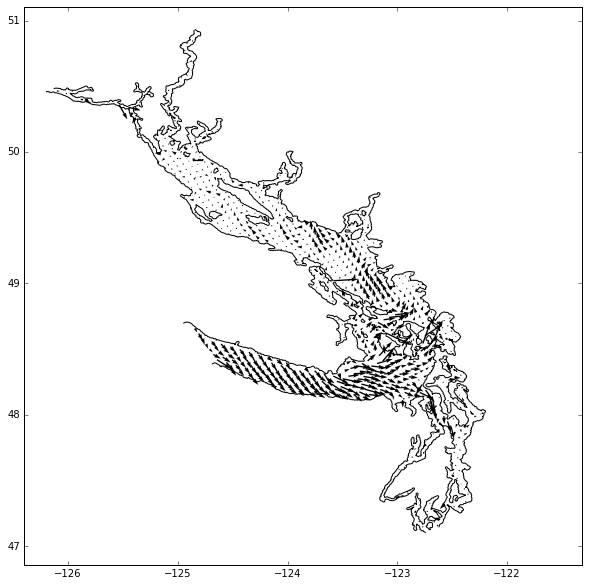

In [7]:
fig,ax = plt.subplots(1,1,figsize=(10,10))

st=10
ax.quiver(Xs[::st,::st],Ys[::st,::st],uunstag[::st,::st],vunstag[::st,::st])
viz_tools.plot_coastline(ax,grid_B,coords='map')


The Not Rotated plot looks like Oceanviewer